## Collating the data into one data file

In [1]:
from data_collator import generate_final_data
generate_final_data()

Level 60:root:Processing file: cleaned_data.csv
Level 60:root:Processing file: data.csv
Level 60:root:Processing file: final_data.csv
Level 60:root:Processing file: January 08 2024.csv
Level 60:root:Processing file: January 09 2024.csv
Level 60:root:Processing file: January 10 2024.csv
Level 60:root:Processing file: January 11 2024.csv
Level 60:root:Processing file: January 12 2024.csv
Level 60:root:Processing file: January 13 2024.csv
Level 60:root:Processing file: January 14 2024.csv
Level 60:root:Processing file: January 15 2024.csv
Level 60:root:Processing file: January 16 2024.csv
Level 60:root:Processing file: January 17 2024.csv
Level 60:root:Processing file: January 08 2024.csv
Level 60:root:Processing file: January 09 2024.csv
Level 60:root:Processing file: January 10 2024.csv
Level 60:root:Processing file: January 11 2024.csv
Level 60:root:Processing file: January 12 2024.csv
Level 60:root:Processing file: January 13 2024.csv
Level 60:root:Processing file: January 14 2024.csv

In [2]:
import pandas as pd
from utils import *

In [3]:
data = pd.read_csv('data/data.csv')

In [4]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087H235,CAD,2.00,3.33%,Aaa,06/01/2028,94.55,94.77,08/01/2017,94.55
1,CA135087N266,CAD,1.50,3.27%,Aaa,12/01/2031,87.68,87.82,10/25/2021,87.68
2,CA135087L443,CAD,0.50,3.28%,Aaa,12/01/2030,83.08,83.17,10/05/2020,83.08
3,CA135087M847,CAD,1.25,3.61%,Aaa,03/01/2027,93.13,93.15,10/15/2021,93.13
4,CA135087M276,CAD,1.50,3.28%,Aaa,06/01/2031,88.36,88.50,4/26/2021,88.36
...,...,...,...,...,...,...,...,...,...,...
401,CA135087VH40,CAD,9.00,4.22%,Aaa,6/1/2025,106.11,106.23,8/2/1994,106.11
402,CA135087Q640,CAD,3.50,4.20%,Aaa,8/1/2025,98.91,98.98,5/12/2023,98.91
403,CA135087Q806,CAD,4.50,4.07%,Aaa,11/1/2025,100.72,100.73,8/4/2023,100.72
404,CA135087R226,CAD,4.50,3.88%,Aaa,2/1/2026,101.08,101.21,11/1/2023,101.08


In [5]:
data = data.loc[data.groupby('ISIN')['Ask'].idxmax()]

In [6]:
data.reset_index(inplace=True)

In [7]:
data.drop('index', axis=1, inplace=True)

In [8]:
data.head()

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087B451,CAD,2.50,5.01%,Aaa,6/1/2024,99.09,99.10,7/2/2013,99.09
1,CA135087D507,CAD,2.25,4.21%,Aaa,6/1/2025,97.36,97.49,6/30/2014,97.36
2,CA135087E679,CAD,1.50,3.70%,Aaa,6/1/2026,95.13,95.26,7/21/2015,95.13
3,CA135087F825,CAD,1.00,3.42%,Aaa,6/1/2027,92.35,92.68,8/3/2016,92.35
4,CA135087H235,CAD,2.00,3.26%,Aaa,6/1/2028,94.93,95.06,8/1/2017,94.93


In [9]:
data.to_csv('data/cleaned_data.csv', index=False)

In [10]:
data = pd.read_csv('data/cleaned_data.csv')

In [11]:
data.head()

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087B451,CAD,2.50,5.01%,Aaa,6/1/2024,99.09,99.10,7/2/2013,99.09
1,CA135087D507,CAD,2.25,4.21%,Aaa,6/1/2025,97.36,97.49,6/30/2014,97.36
2,CA135087E679,CAD,1.50,3.70%,Aaa,6/1/2026,95.13,95.26,7/21/2015,95.13
3,CA135087F825,CAD,1.00,3.42%,Aaa,6/1/2027,92.35,92.68,8/3/2016,92.35
4,CA135087H235,CAD,2.00,3.26%,Aaa,6/1/2028,94.93,95.06,8/1/2017,94.93


In [12]:
data['Maturity Date'] = pd.to_datetime(data['Maturity Date'], format='%m/%d/%Y')
data['Issue Date'] = pd.to_datetime(data['Issue Date'], format='%m/%d/%Y')

In [13]:
data = get_bonds(data)

D:\Assignment\MAT1856\Assignment\Assignment 1\utils.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Par Value"] = 1000
D:\Assignment\MAT1856\Assignment\Assignment 1\utils.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Coupon Payment"] = df["Par Value"] * df["Coupon"] / 200
D:\Assignment\MAT1856\Assignment\Assignment 1\utils.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [14]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity
0,CA135087B451,CAD,2.500,5.01%,Aaa,2024-06-01,99.09,99.10,2013-07-02,99.09,1000,12.500,99.542055,22.150000,25.090293,117,3.900000
1,CA135087D507,CAD,2.250,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,97.36,1000,11.250,97.766849,22.161111,22.590248,482,16.066667
2,CA135087E679,CAD,1.500,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,95.13,1000,7.500,95.401233,22.044444,15.090726,847,28.233333
3,CA135087F825,CAD,1.000,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,92.35,1000,5.000,92.530822,21.966667,10.091047,1212,40.400000
4,CA135087H235,CAD,2.000,3.26%,Aaa,2028-06-01,94.93,95.06,2017-08-01,94.93,1000,10.000,95.291644,21.983333,20.090978,1578,52.600000
6,CA135087J546,CAD,2.250,4.88%,Aaa,2024-03-01,99.64,99.70,2018-10-05,99.64,1000,11.250,100.046849,10.966667,22.682371,25,0.833333
7,CA135087J967,CAD,1.500,4.77%,Aaa,2024-09-01,97.98,98.06,2019-04-05,97.98,1000,7.500,98.251233,10.977778,15.182186,209,6.966667
8,CA135087K528,CAD,1.250,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.250,96.896027,10.933333,12.682927,390,13.000000
9,CA135087K940,CAD,0.500,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.500,94.580411,10.983333,5.182094,574,19.133333
11,CA135087L518,CAD,0.250,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.250,93.065205,10.938889,2.682834,755,25.166667


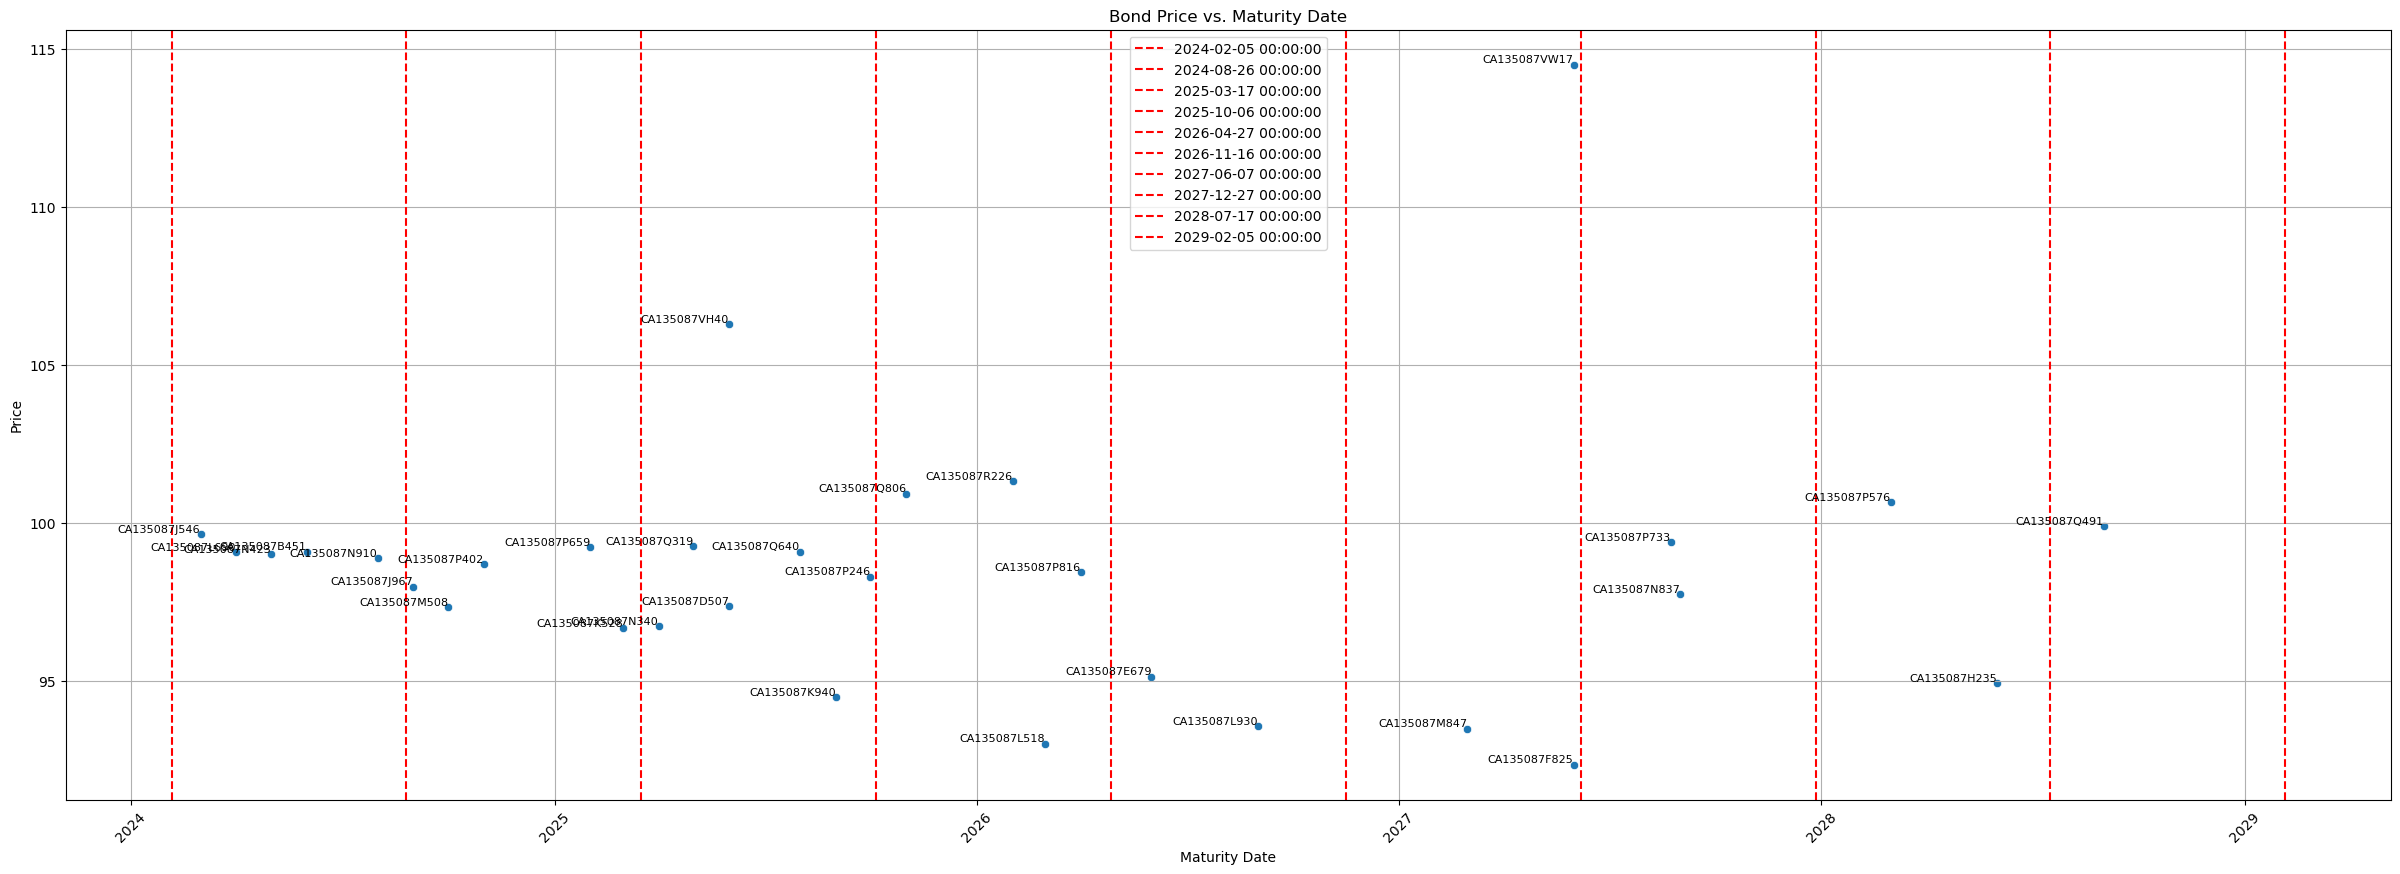

In [15]:
plot_bonds_price(data)

In [16]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity
0,CA135087B451,CAD,2.500,5.01%,Aaa,2024-06-01,99.09,99.10,2013-07-02,99.09,1000,12.500,99.542055,22.150000,25.090293,117,3.900000
1,CA135087D507,CAD,2.250,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,97.36,1000,11.250,97.766849,22.161111,22.590248,482,16.066667
2,CA135087E679,CAD,1.500,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,95.13,1000,7.500,95.401233,22.044444,15.090726,847,28.233333
3,CA135087F825,CAD,1.000,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,92.35,1000,5.000,92.530822,21.966667,10.091047,1212,40.400000
4,CA135087H235,CAD,2.000,3.26%,Aaa,2028-06-01,94.93,95.06,2017-08-01,94.93,1000,10.000,95.291644,21.983333,20.090978,1578,52.600000
6,CA135087J546,CAD,2.250,4.88%,Aaa,2024-03-01,99.64,99.70,2018-10-05,99.64,1000,11.250,100.046849,10.966667,22.682371,25,0.833333
7,CA135087J967,CAD,1.500,4.77%,Aaa,2024-09-01,97.98,98.06,2019-04-05,97.98,1000,7.500,98.251233,10.977778,15.182186,209,6.966667
8,CA135087K528,CAD,1.250,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.250,96.896027,10.933333,12.682927,390,13.000000
9,CA135087K940,CAD,0.500,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.500,94.580411,10.983333,5.182094,574,19.133333
11,CA135087L518,CAD,0.250,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.250,93.065205,10.938889,2.682834,755,25.166667


In [17]:
data = zero_coupon_bonds(data)

D:\Assignment\MAT1856\Assignment\Assignment 1\utils.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_df["Zero_Yield"] = np.log((zero_df["Par Value"] + zero_df["Coupon Payment"]) / zero_df["Dirty Price"]) / zero_df["Months to Maturity"]


In [18]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity,Zero_Yield
0,CA135087D507,CAD,2.250,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,97.36,1000,11.250,97.766849,22.161111,22.590248,482,16.066667,NaN
1,CA135087E679,CAD,1.500,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,95.13,1000,7.500,95.401233,22.044444,15.090726,847,28.233333,NaN
2,CA135087F825,CAD,1.000,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,92.35,1000,5.000,92.530822,21.966667,10.091047,1212,40.400000,NaN
3,CA135087H235,CAD,2.000,3.26%,Aaa,2028-06-01,94.93,95.06,2017-08-01,94.93,1000,10.000,95.291644,21.983333,20.090978,1578,52.600000,NaN
4,CA135087J967,CAD,1.500,4.77%,Aaa,2024-09-01,97.98,98.06,2019-04-05,97.98,1000,7.500,98.251233,10.977778,15.182186,209,6.966667,NaN
5,CA135087K528,CAD,1.250,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.250,96.896027,10.933333,12.682927,390,13.000000,NaN
6,CA135087K940,CAD,0.500,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.500,94.580411,10.983333,5.182094,574,19.133333,NaN
7,CA135087L518,CAD,0.250,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.250,93.065205,10.938889,2.682834,755,25.166667,NaN
8,CA135087L930,CAD,1.000,3.61%,Aaa,2026-09-01,93.57,93.69,2021-04-16,93.57,1000,5.000,93.750822,10.911111,10.183299,939,31.300000,NaN
9,CA135087M508,CAD,0.750,4.64%,Aaa,2024-10-01,97.33,97.34,2021-07-12,97.33,1000,3.750,97.465616,6.538889,7.805862,239,7.966667,NaN


In [19]:
data = data.loc[data.query("10 < `Compounding Periods` < 11").index]
data = data.reset_index(drop=True)

In [20]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price,Par Value,Coupon Payment,Dirty Price,Compounding Periods,YTM,Days to Maturity,Months to Maturity,Zero_Yield
0,CA135087J967,CAD,1.50,4.77%,Aaa,2024-09-01,97.98,98.06,2019-04-05,97.98,1000,7.50,98.251233,10.977778,15.182186,209,6.966667,NaN
1,CA135087K528,CAD,1.25,4.31%,Aaa,2025-03-01,96.67,96.68,2019-10-11,96.67,1000,6.25,96.896027,10.933333,12.682927,390,13.000000,NaN
2,CA135087K940,CAD,0.50,4.07%,Aaa,2025-09-01,94.49,94.61,2020-04-03,94.49,1000,2.50,94.580411,10.983333,5.182094,574,19.133333,NaN
3,CA135087L518,CAD,0.25,3.74%,Aaa,2026-03-01,93.02,93.03,2020-10-09,93.02,1000,1.25,93.065205,10.938889,2.682834,755,25.166667,NaN
4,CA135087L930,CAD,1.00,3.61%,Aaa,2026-09-01,93.57,93.69,2021-04-16,93.57,1000,5.00,93.750822,10.911111,10.183299,939,31.300000,NaN
5,CA135087M847,CAD,1.25,3.48%,Aaa,2027-03-01,93.49,93.51,2021-10-15,93.49,1000,6.25,93.716027,10.905556,12.683393,1120,37.333333,NaN
6,CA135087N837,CAD,2.75,3.41%,Aaa,2027-09-01,97.75,97.87,2022-05-13,97.75,1000,13.75,98.247260,10.761111,27.685854,1304,43.466667,NaN
7,CA135087P576,CAD,3.50,3.32%,Aaa,2028-03-01,100.65,100.72,2022-10-21,100.65,1000,17.50,101.282877,10.877778,35.183861,1486,49.533333,NaN
8,CA135087Q491,CAD,3.25,3.27%,Aaa,2028-09-01,99.90,99.99,2023-04-21,99.90,1000,16.25,100.487671,10.888889,32.683673,1670,55.666667,NaN
9,CA135087J546,CAD,2.25,4.88%,Aaa,2024-03-01,99.64,99.70,2018-10-05,99.64,1000,11.25,100.046849,10.966667,22.682371,25,0.833333,2.775965


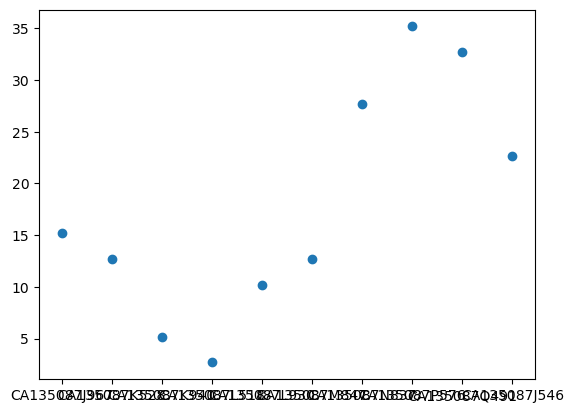

In [21]:
import matplotlib.pyplot as plt

plt.scatter(x="ISIN", y="YTM", data=data)